[Datitos: Aprendizaje profundo](https://datitos.github.io/curso-aprendizaje-profundo/)

[T.P. N°2 - Aprendizaje Profundo 2021 by Datitos](https://www.kaggle.com/c/tp-n2-aprendizaje-profundo-2021-by-datitos-v2)

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../lib')

In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from pandas_profiling import ProfileReport

from data import OverUnderSampler, to_single_col_df

In [4]:
train_set = pd.read_csv('./dataset/fifa2021_training.csv')

In [5]:
# ProfileReport(train_set, title="Exploratory Analisys", explorative=True)to_file("report.html")

In [6]:
INDIVIDUAL_FEATURES = [
    'Overal',
    'Potential',
    'Height',
    'Weight',
    'PreferredFoot',
    'Age',
    'PlayerWorkRate',
    'WeakFoot',
    'SkillMoves', 
    'Value',
    'Wage',
    'Club',
    'Club_KitNumber',
    'Club_JoinedClub',
    'Club_ContractLength'
]

SKILL_FEATURES = [
    'BallControl', 'Dribbling', 'Marking', 'SlideTackle', 'StandTackle', 'Aggression',
    'Reactions', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'ShortPass',
    'LongPass', 'Acceleration', 'Stamina', 'Strength', 'Balance', 'SprintSpeed',
    'Agility', 'Jumping', 'Heading', 'ShotPower', 'Finishing', 'LongShots',
    'Curve', 'FKAcc', 'Penalties', 'Volleys', 'GKDiving', 'GKHandling',
    'GKKicking', 'GKReflexes'
]
TARGET = 'Position'

CAL_COLS = [ 'PreferredFoot', 'PlayerWorkRate']

In [7]:
def columns_with_missing(df): return [col for col in df.columns if df[col].isnull().any()]

In [8]:
feature_columns = list(set(INDIVIDUAL_FEATURES + SKILL_FEATURES) -  set(columns_with_missing(train_set)))

In [9]:
train_set = train_set[feature_columns + [TARGET]]

In [10]:
def preprocess(df): 
    features = df[feature_columns]
    for col in CAL_COLS:
        features = pd.concat([features, pd.get_dummies(features[col], dummy_na=False)], axis=1)
    features = features.drop(CAL_COLS, axis=1)
    
    target = pd.get_dummies(df[[TARGET]], dummy_na=False) if TARGET in df.columns else None

    return features, target

In [11]:
def plot_df_clases_count(df, class_col):
    groups = train_set[[class_col]] \
      .groupby(class_col) \
      .size() \
      .reset_index(name='count')
    sns.barplot(data=groups, x=class_col, y='count')

def plot_array_clases_count(values):
    groups = values \
        .mean() \
        .reset_index(name='count') \
        .rename(columns={"index": "Name"})

    sns.barplot(data=groups, x="Name", y='count')

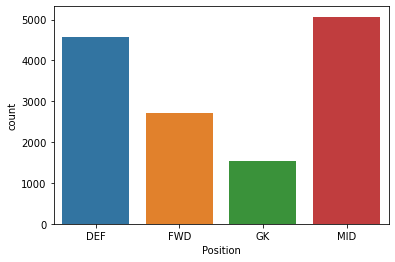

In [12]:
plot_df_clases_count(train_set, TARGET)

In [13]:
X, y = preprocess(train_set)

In [45]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [46]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X, y)

RandomForestRegressor(n_estimators=150)

<BarContainer object of 50 artists>

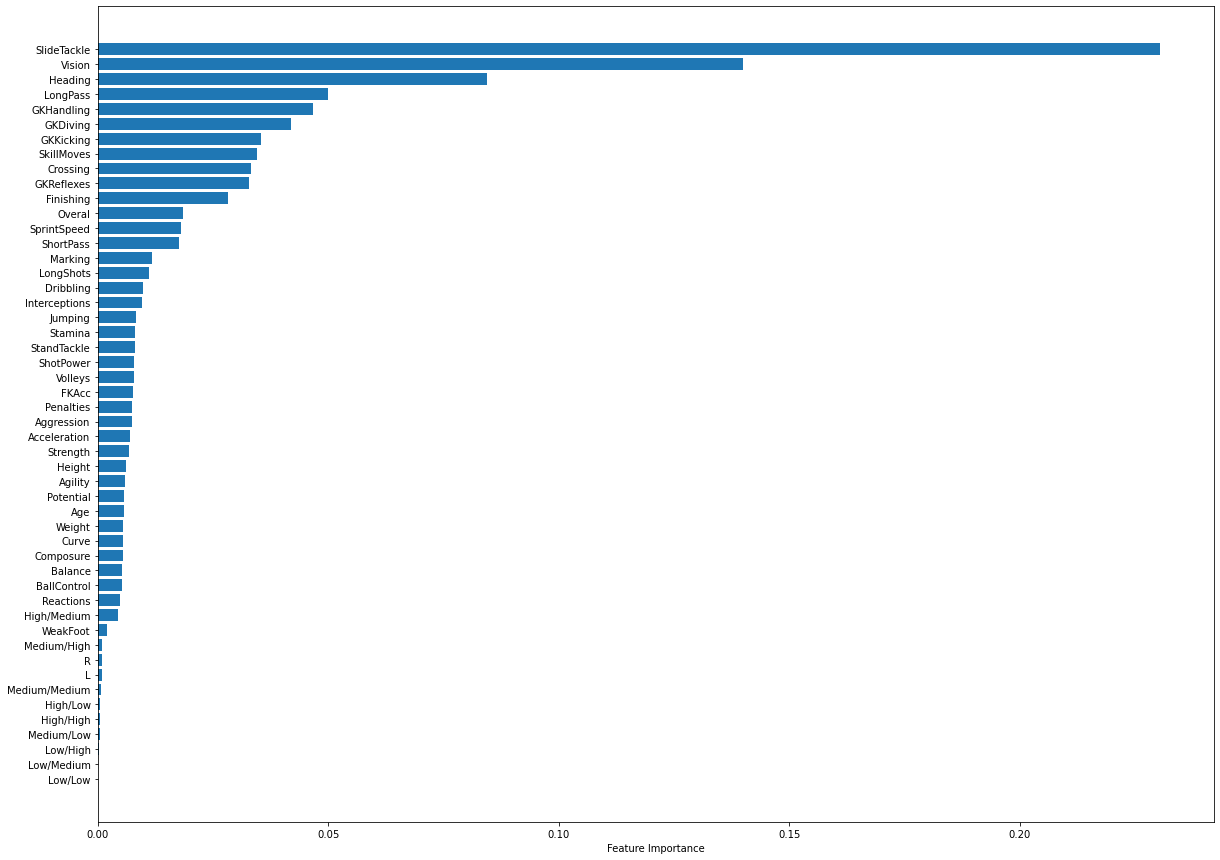

In [47]:
sort = rf.feature_importances_.argsort()

plt.rcParams["figure.figsize"] = (20,15)

plt.xlabel("Feature Importance")
plt.barh(X.columns[sort], rf.feature_importances_[sort])